### Seaborn plotting

How does seaborn work and how can you manipulate it to get the best plots?

In [2]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Seaborn basics  
How do you produce a plot?

Numpy is the python library for handling maths.  
Matplotlib is a python library built on Numpy which draws plots.  
Seaborn is a python library built on Numpy, pandas and matllibplot which draws beautiful, customisable plots.  

There is LOTS of online help in making your seaborn plots exactly how you want them:  

    https://seaborn.pydata.org/introduction.html

#### Matplotlib

Matplot is the python library for plotting.  It plots data on *Axes* in a *Figure*.  For our purposes the *Figure* is a jupyter notebook cell and the *Axes* is the graph.


https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

Here's the anatomy of a matplotlib figure.  This will help you use the correct terms when googling for help.

![title](Parts_of_plot.webp)

All of these features can be controled

Make up some data to plot using. 

    data = np.ones(100)
    data[70:] -= np.arange(30)

Check what the data looks like

Define a figure space, 
    
    fig = plt.figure()  
        
put in some axes,  defining the [left, bottom, width, height] of the axes as fractions of figure width and height.

    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))  
    
plot the data on these axes  
    
    ax.plot(data)  
    


Try changing the height and width (left and bottom make no difference where you have a single plot in a figure)

Modify the plot to set x and y limits and remove tick labels  

Set Y to be between -30 and 10  

    ax.set_ylim([-30, 10])  
    
Set the x axis ticks to be nothing. 

    ax.set_xticks([])
    
Set the y axis ticks to be nothing. 
    
    ax.set_yticks([])

Try modifying the axis lengths and the tick positions

Change the size of the plot (default is inches )  

    fig.set_size_inches(6, 6)  
    
You can use cm instead by defining the conversion  

    cm = 1/2.54
    fig.set_size_inches(10*cm, 10*cm) 


#### Adding text to the figure. 

Labeling your x and y axises is easy, so no excuse to miss this!

    ax.set_xlabel('x axis label')
    
    ax.set_ylabel('y axis label')
    
The title is set with fig.text. setting location on the x and y axis, a string for the text, and positon on the horizontal (center, left or right)

    fig.text(0.5, 0.05, 'Title', ha='center')
    
You can also annotate the graph with a string, giving postion of the point, arrow type, and poistion of the text

    ax.annotate('text on graph',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))
        
       
Annotate and label your graph to make the plot shown here,

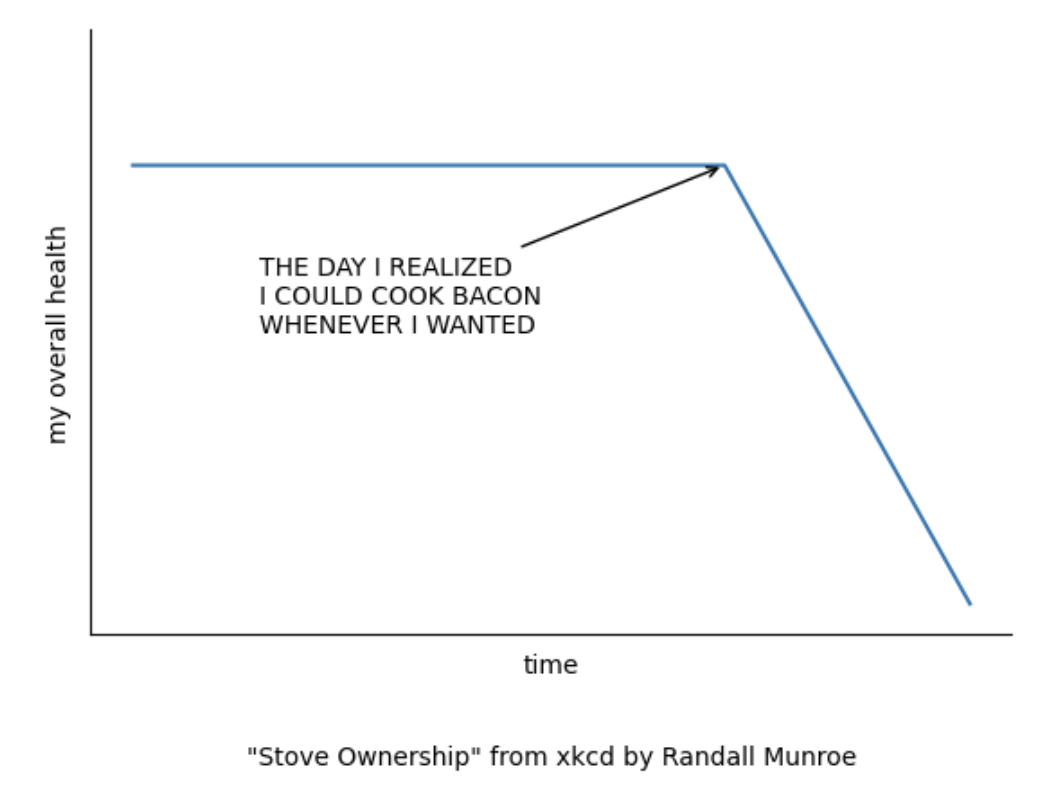

We can apply an overall style to the plot using plt.style.use().  You can list available styles:  
    
    plt.style.available

We can also make the plots in true xkcd style using

    plt.xkcd()
    
To return the plotting parameters to normal use:

    plt.rcdefaults()

You can save your plot to file using:

    fig.savefig('title of file', dpi=100)

Seaborn is a library of styles which, like the 'xkcd' style here, works over Matplotlib.  Seaborn does much more than just a default style.  It makes it easy to plot a whole range of graphs to explore your dataset.  As it is working over matplotlib  you sometimes have to work wiht matplotlib to control aspects of the plot.

### Seaborn plot types

We'll look at some seaborn plots using a built in data set of floral organ lengths for 3 species of Iris from three habitats.  This data set has categorical data (species, site) and numerical site (the lengths).

In [84]:
df = pd.read_table("../Datasets/Iris.txt")

Check the data using df.head()

Seaborn makes it easy to switch between different plot types, generating distribution plots by quantitiative or categorical datatypes, examine the relationships between variables and combine these appraoches.  
Here's the main types of plot seaborn does for relational plots, for distributions and for categorical plots.  We'll illustrate these using the iris data.

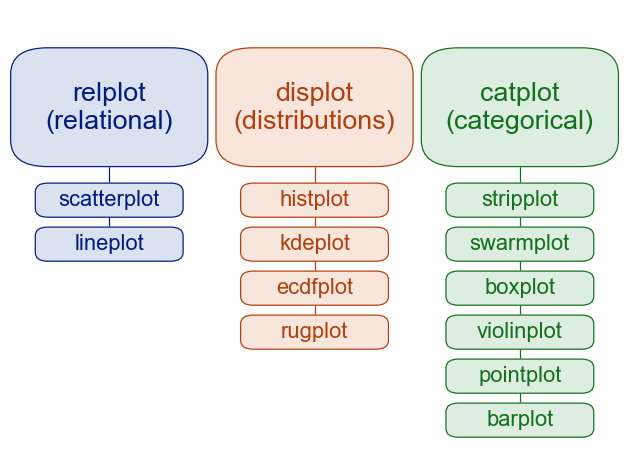

### Data distribution. displot
Shows the distribution of numerical data.  

    sns.displot(data=df, x="my_metric")

We can print plots side by side using the argument:   
    
    col="column"
    
 Print the distribution of sepal length for each species.

We can get fancier, adding in categorical information by colouring by site and showing the continuous distribuiton of the data with kernel density plotting.  

    hue="Site"
    kde=True

Try the other way round, with sites in columns and species coded by colour

### Categorical data. catplot
We can focus on the categorical dimension, making that the x axis and plotting all the data points in a scatter plot along the y axis.  Colouring by site allows us to present all the data.  

    sns.catplot(data=df)



The default is strip plot, showing all the datapoints.  Try out the types of catplot.  

    kind="swarm"
    kind="strip"
    kind="box"
    kind="violin"
    kind="point"
    kind="bar"
    kind="count"

What is the difference beween strip and swarm?  
What do the error bars on bar and on point represent?  

You can add more colour:  
    
    hue="Site"

Plot a swarm plot of sepal length by species, coloured by site (use hue=)

This is maybe too noisy to be able to see patterns.  We cam simplfy things to focus on difference beteen catagories.  
Comparing Marsh and Roadside in a split violin plot.  
We want to look at just Marsh and Roadside so replace df with 

    df[df.Site != "Field"]

colour by site and use the parameter  

    split=True

You can add even more richness tt he plot by showing individual data points with. 

    inner="stick"

Compare Marsh and Field, and Roadside and Field

Can show median and SE instead

### Relationships. 
To show the relationship between two numerical values we can use relplot  

    sns.relplot(data=df)

Obviously this works better if we specify which parts of the dataframe we want to look for relationships between

Plot petal length by sepal length for each species coloured by site

scatter plot is the default.  by specifying kind="line" you can plot as a line graph.
Confidence intervals are added by default if there are overlapping points.  The main line is the mean and the shaded regions the 95% confidence interval.

lmplot is a subset of relplot for linear regressions.  It adds a linear regression line for y~x, along with 95% confidence boundaries.

Use lmplot to look at the relationship between sepal length and petal length

Use hue="Species" or col="Species" or row="Species" to make this a bit more useful

You can fit second order lines to the data using order=2

You can ignore outliers using robust=True

You will learn do about regression in the next few weeks.

### Other plot types

We can plot categorical data against each other using heatmaps.  These are commonly used for correlations.
Calculate the correlation matrix for floral organ lengths like this. 

    corr = df.corr()

This easily plots as a heat map  

    sns.heatmap(corr)

### Composite plots
It's often useful to present both catagorical plots and numeric plots together.  Seaborn's joint plot allows this.  


    sns.jointplot(data=df, x="sepal_length", y="petal_length")

Adding colour to show species reveals the patterns in the data - use hue=. as before

You can bin the numerical data in a density plot using kind="hex"

Pairplot is great for exploring as it plots as much as possible in one figure  

    sns.pairplot(data=df)
    
Like joint plot you can add to this with 'hue'

### Seaborn styles  
Seaborn has a number of default stypes which control the look of the plot.  Set the style with:  

    sns.set_style("whitegrid")  
    
Then plot the jointplot.  
Try some other styles:  

    sns.set_style("dark")  
    sns.set_style("ticks")  
    
and output for specific presentation types:  

    sns.set_context("paper")  
    sns.set_context("talk")  
    sns.set_context("poster")  
    sns.set_context("notebook")

Here's how to move the legend box if it ends up on top of your plot

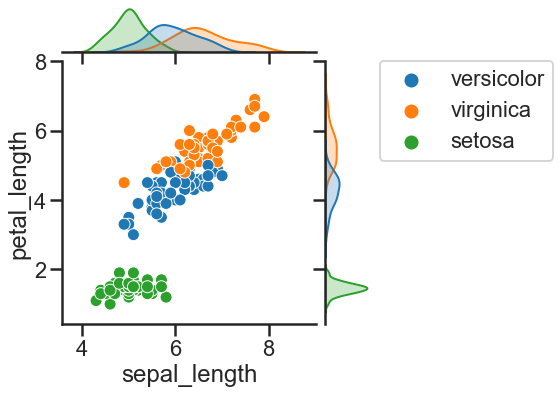

In [187]:
g = sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="Species")
g.ax_joint.legend(bbox_to_anchor=(1.25,1), loc='upper left', borderaxespad=0)

### Seaborn colour palettes

Seaborn has six variations of matplotlib’s palette, called deep, muted, pastel, bright, dark, and colorblind. 

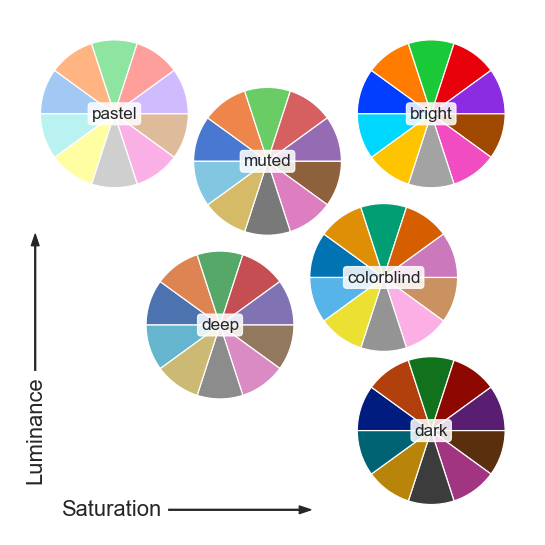

This is the current palette

In [15]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Maybe you prefer a different one

In [ ]:
sns.color_palette('dark')

We can specfiy the new palette

In [163]:
sns.set_palette('dark')

and re-do the last plot

Here's the list of seaborn set palettes.  You can, of course customise your own palette.  There is lots more detail on this here: https://seaborn.pydata.org/tutorial/color_palettes.html   
tab10 is the default palette

 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


Test out some palettes on the last plot.

Go back to the default with:  
    
    sns.set_palette('tab10') 

### Combining plots into a single figure

Planning multi-panel plots brings us to the distinction between figures and axes in seaborn.  You will usually come across this as an error message when you try to treat a figure as an axes or vice versa.  

Some seaborn command output axes, some output facetgrids.

In [ ]:
my_plot = sns.histplot(data=df, x="sepal_length", hue="Species")
type(my_plot)

In [ ]:
my_plot = sns.displot(data=df, x="sepal_length", hue="Species")
type(my_plot)

Explore the seaborn plots you know.  Which output axes and which output facetgrids?  Make a list and keep it handy!

#### Why does this matter?

An axes is a solitary plot.  A facetgrid is a space for plotting as many plots as you like.  You've used this approach earlier when plotting by differnt factors in rows and in columns.  
You can be fancier and assemble diffent type of plots in a facet grid.

In [ ]:
#Make figure f, of size 10 x 5 with two axes
f, axs = plt.subplots(1,2, figsize=(10, 5))
#scatterplot on axes 1 (zero-based)
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="Species", ax=axs[0])
#histogram on axes 2 put legend as 'False' so as not to clutter things
sns.histplot(data=df, x="sepal_length", hue="Species", legend=False, ax=axs[1])

Plot a violin plot of petal width by Site next to a scatter plot of petal length by sepal length coloured by site.  

Use sns.violinplot and sns.scatterplot, sns.catplot does not work well in joint figures

Using rows in a facetgrid as well as columns can be done like this:

In [ ]:
#build the FacetGrid
g = sns.FacetGrid(df, col="Species", row="Site")
#Add the plots
g.map(sns.histplot, "sepal_length", kde=True)

Instead of specifiying a factor for each row you can wrap the rows using:
    
        col_wrap=
        
Plot histograms of sepal width by species with 2 plots per row

### Change size and arrangement of plots


If you're using a seaborn function that draws a single plot (axes), use matplotlib.pyplot.figure with the figsize keyword 
If you're using a seaborn function that draws multiple plots (FacetGrid), use the height and aspect keyword arguments.   

matplotlib command to change figure size  

    plt.figure(figsize=(5,5))
the figure  

    sns.histplot(data=df, x="sepal_length", hue="Species")

Experiment to see which of the two values in the matplotlib command is height and which is width

You can also change size using height= and aspect= in a seaborn plot.

Aspect is not width!  It is the ratio of width to height.  These parameters apply to each subplot separately, not to the figure as a whole. Check with a multiple plot figure.

Similarily, for changing axes labels there are different approaches to doing this for Axes and FacetGrids. 

In [ ]:
#plot the figure to an object
my_object = sns.swarmplot(data=df, x="Species", y="sepal_length")
#get the x axis lables from the object and rotate them (the semicolon stop it printing the labels out att he top of the figure)
my_object.set_xticklabels(my_object.get_xticklabels(), rotation=45);


You can do lots with label fomatting:
    
    
    horizontalalignment='right'
    fontweight='bold'
    fontsize='x-large'
    style='italic'

For a facetgrid the format is a bit different:

In [ ]:
#plot the figure to an object
my_object = sns.catplot(data=df, x="Species", y="sepal_length", kind="swarm")
#unlike with the Axes object you don't need to "get" the lables to manipulate them
my_object.set_xticklabels(rotation=45)

You can use the same parameters to change the formatting:

    horizontalalignment='right'
    fontweight='bold'
    fontsize='x-large'
    style='italic'

Generaly, if your code doesn't work as expected check where you are creating Axes or Facetgrids!

After playing with figure size and colour you will find this useful:  


        sns.reset_defaults()